In [71]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import re

#retina
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

sns.set_style("white")

#### Content

##### Anime.csv
* anime_id - myanimelist.net's unique id identifying an anime.
* name - full name of anime.
* genre - comma separated list of genres for this anime.
* type - movie, TV, OVA, etc.
* episodes - how many episodes in this show. (1 if movie).
* rating - average rating out of 10 for this anime.
* members - number of community members that are in this anime's "group".

##### Rating.csv
* user_id - non identifiable randomly generated user id.
* anime_id - the anime that this user has rated.
* rating - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).

##### Acknowledgements
Thanks to myanimelist.net API for providing anime data and user ratings.

##### Inspiration
Building a better anime recommendation system based only on user viewing history.

## Exploratory Data Analysis (EDA)

#### Anime_C.csv

In [53]:
# Show data
df1 = pd.read_csv('anime_C.csv',index_col=0)
df1.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,movie,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,movie,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [54]:
print('Number of anime : ',df1.shape[0])
print('Number of columns : ',df1.shape[1])

Number of anime :  12294
Number of columns :  7


In [55]:
# Checking on continuous variable
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
anime_id,12294.0,14058.221653,11455.294701,1.0,3484.25,10260.50,24794.50,34527.0
rating,12294.0,6.352786,1.343119,0.0,5.82,6.55,7.17,10.0
members,12294.0,18071.338864,54820.676925,5.0,225.00,1550.00,9437.00,1013917.0


In [56]:
df1.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

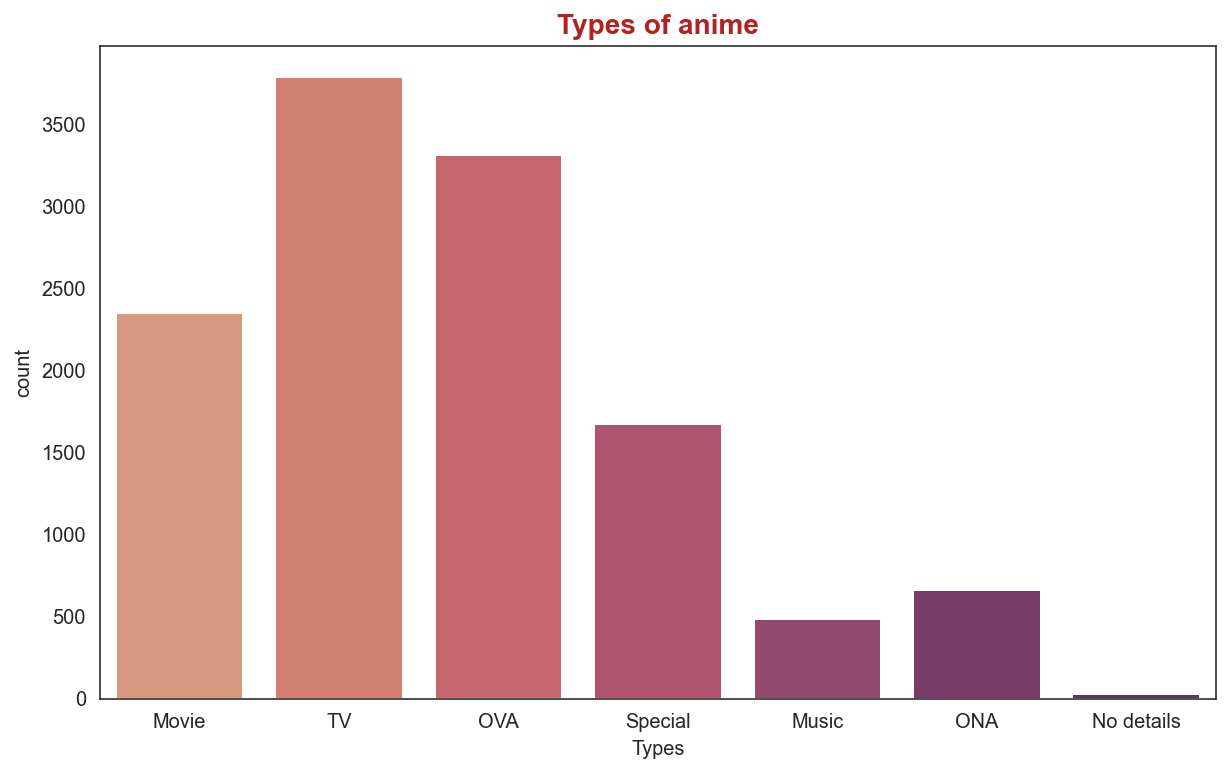

In [117]:
# Bar plot of types of anime.
plt.figure(figsize=(10,6))
sns.countplot(x='type',data=df1,saturation=0.7,palette='flare')
plt.title('Types of anime',fontsize=14,color = 'firebrick',fontweight='bold')
plt.xlabel('Types',fontsize=10)
plt.show()

*Interpreting:*

    It seems like a lot of anime its kinds of TV streaming and OVA but somes are from the Movie and Music. By the way, some of anime don't actually know the types show as 'No detail'

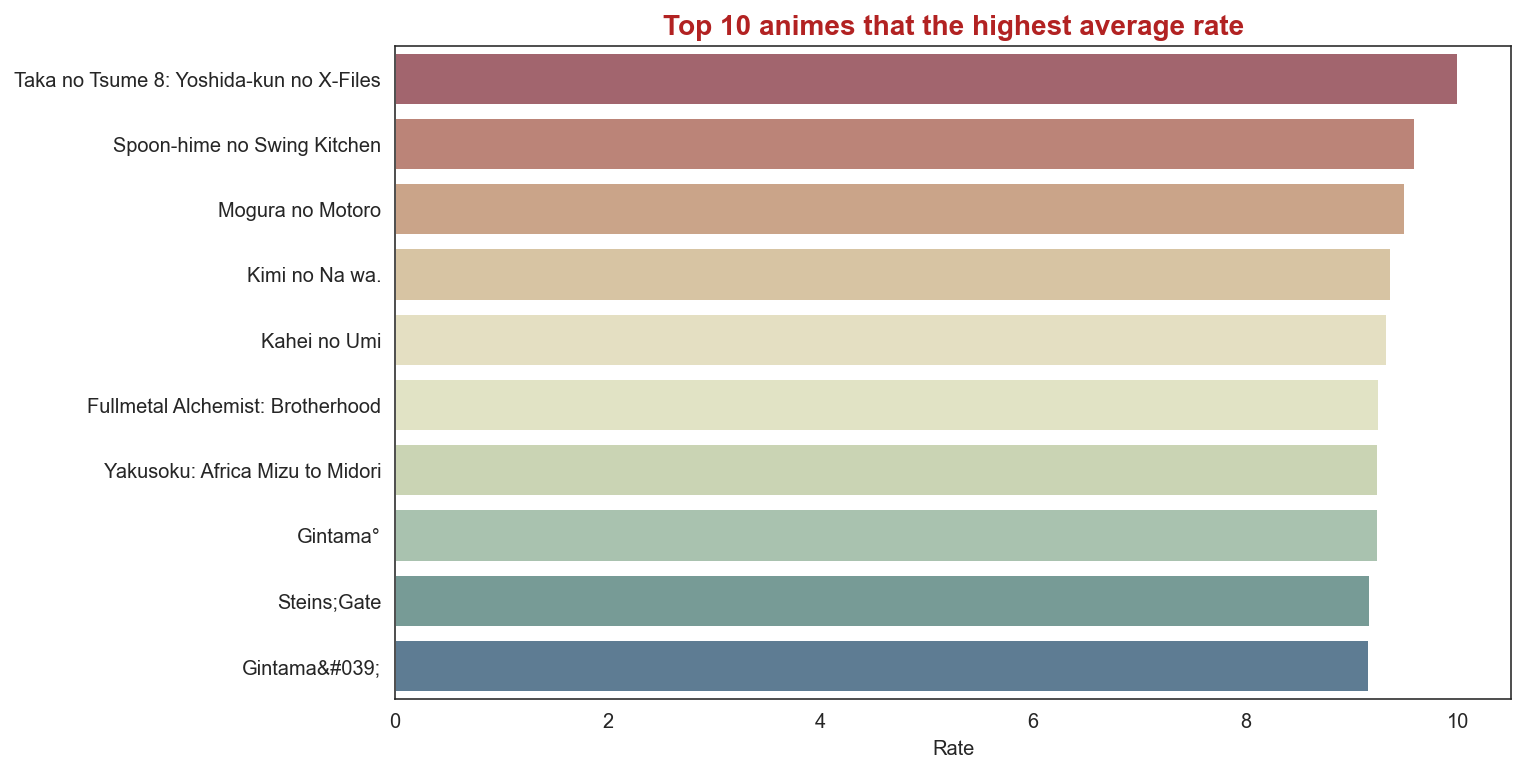

In [92]:
# What are the anime that obtained the hightest average rate from user.?
sort_avg = df1.sort_values('rating',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='rating',y='name',data=sort_avg.head(10),saturation=0.4, palette="Spectral")
plt.ylabel(None)
plt.xlabel('Rate',fontsize=10)
plt.title('Top 10 animes that the highest average rate',fontsize=14,color = 'firebrick',fontweight='bold')
plt.show()
           

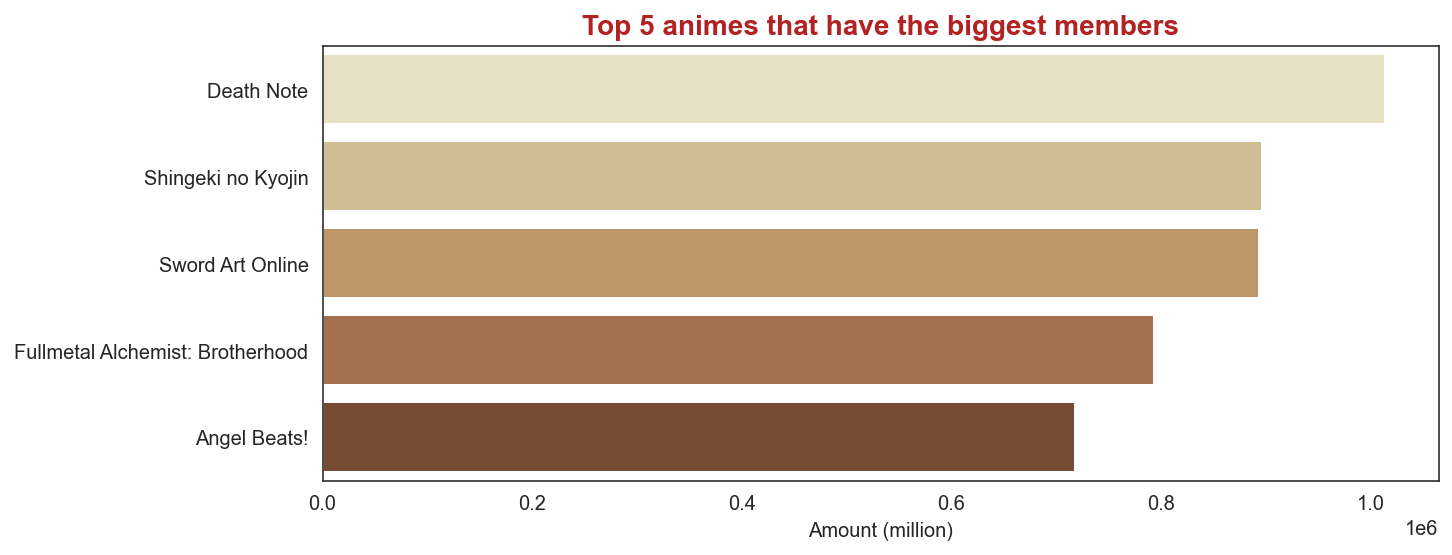

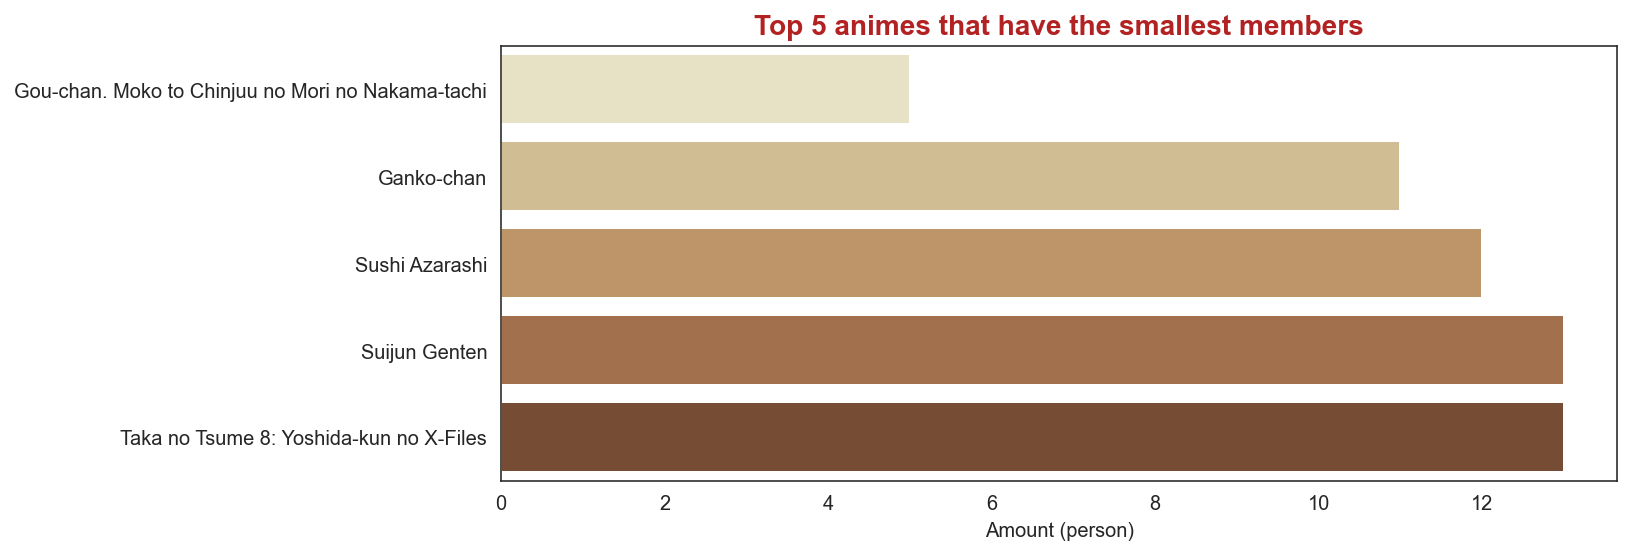

In [102]:
# What are the anime that have the biggest member?
sort_mem_max = df1.sort_values('members',ascending=False)
sort_mem_min = df1.sort_values('members',ascending=True)

plt.figure(figsize=(10,4))
fig1 = sns.barplot(x='members',y='name',data=sort_mem_max.head(5),saturation=0.4,palette='YlOrBr')
plt.ylabel(None)
plt.xlabel('Amount (million)',fontsize=10)

plt.title('Top 5 animes that have the biggest members',fontsize=14,color = 'firebrick',fontweight='bold')

plt.figure(figsize=(10,4))
fig2 = sns.barplot(x='members',y='name',data=sort_mem_min.head(5),saturation=0.4,palette='YlOrBr')
plt.ylabel(None)
plt.xlabel('Amount (person)',fontsize=10)
plt.title('Top 5 animes that have the smallest members',fontsize=14,color = 'firebrick',fontweight='bold')

plt.show(fig1,fig2)




In [60]:
# What characteristic of those anime (biggest member)
sort_mem_max.head(5)

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796


In [61]:
# What characteristic of those anime (smallest member)
sort_mem_min.head(5)

,anime_id,name,genre,type,episodes,rating,members
10997,34527,Gou-chan. Moko to Chinjuu no Mori no Nakama-tachi,"Adventure, Kids",Movie,movie,0.0,5
10990,34485,Ganko-chan,No details,No details,Unknown,0.0,11
10444,34490,Sushi Azarashi,Comedy,TV,30,3.0,12
10424,33320,Suijun Genten,No details,Movie,movie,7.0,13
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,movie,10.0,13


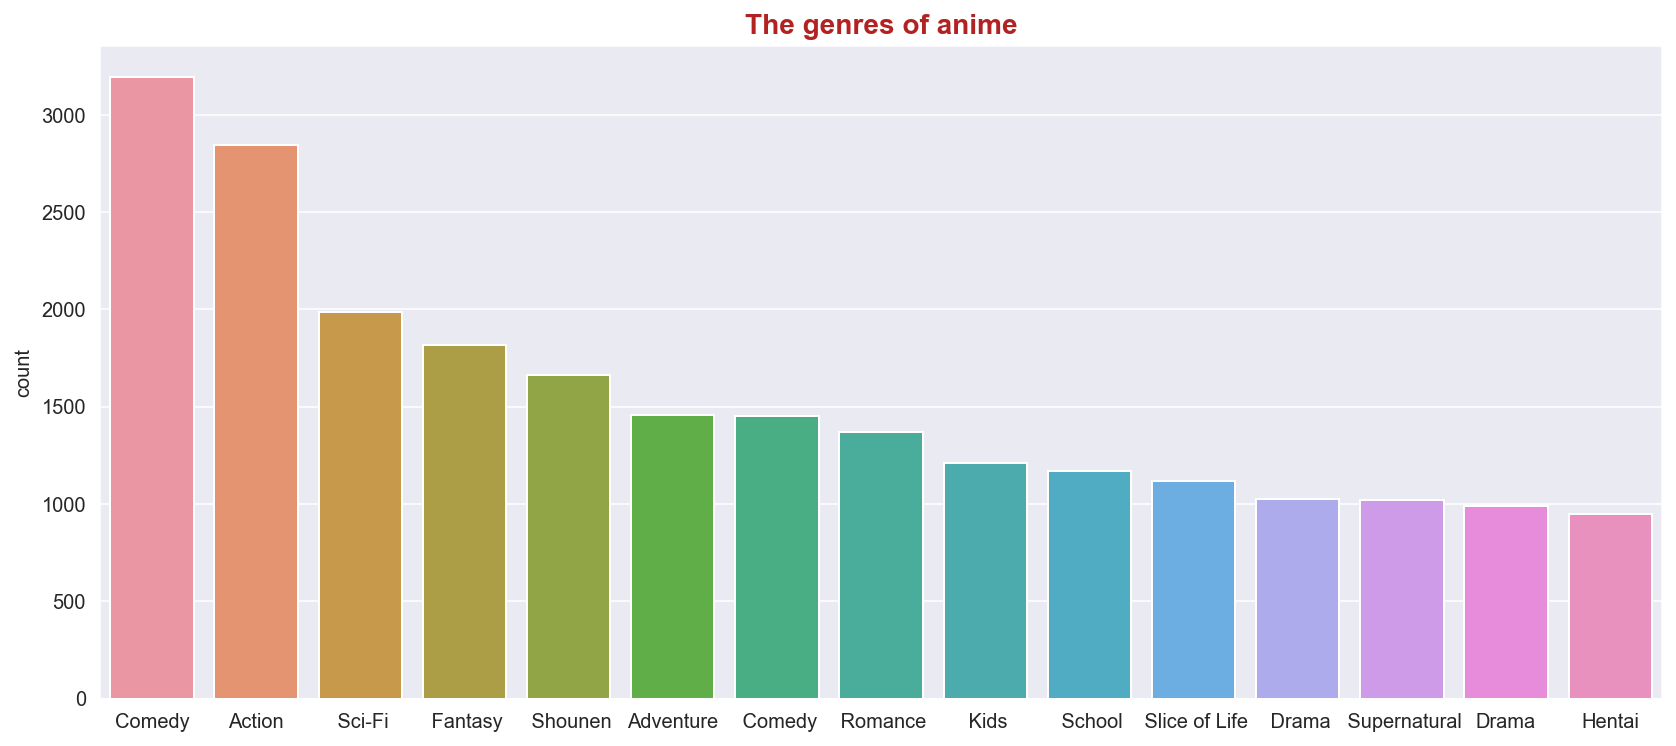

In [62]:
# Creating bag of word for genre visualization
bag_df = df1.copy()

t1 = bag_df['genre']
r1 =[]

for i in t1:
    o = re.split(r',',i)
    r1.append(o)

word = []
for i in r1:
    for j in i:
        word.append(j)
        
bag_of_word = pd.DataFrame(word,columns=['genre'])
bag_of_word['count'] = 1
bag_word = bag_of_word.groupby('genre')[['count']].sum()
bag_word = bag_word.sort_values('count',ascending=False)
bag_word.reset_index(inplace=True)

# ploting
plt.figure(figsize=(14,6))
sns.barplot(x='genre',y='count',data=bag_word.head(15))
plt.title('The genres of anime',fontsize=14,color='firebrick',fontweight='bold')
plt.xlabel(None)
plt.show()

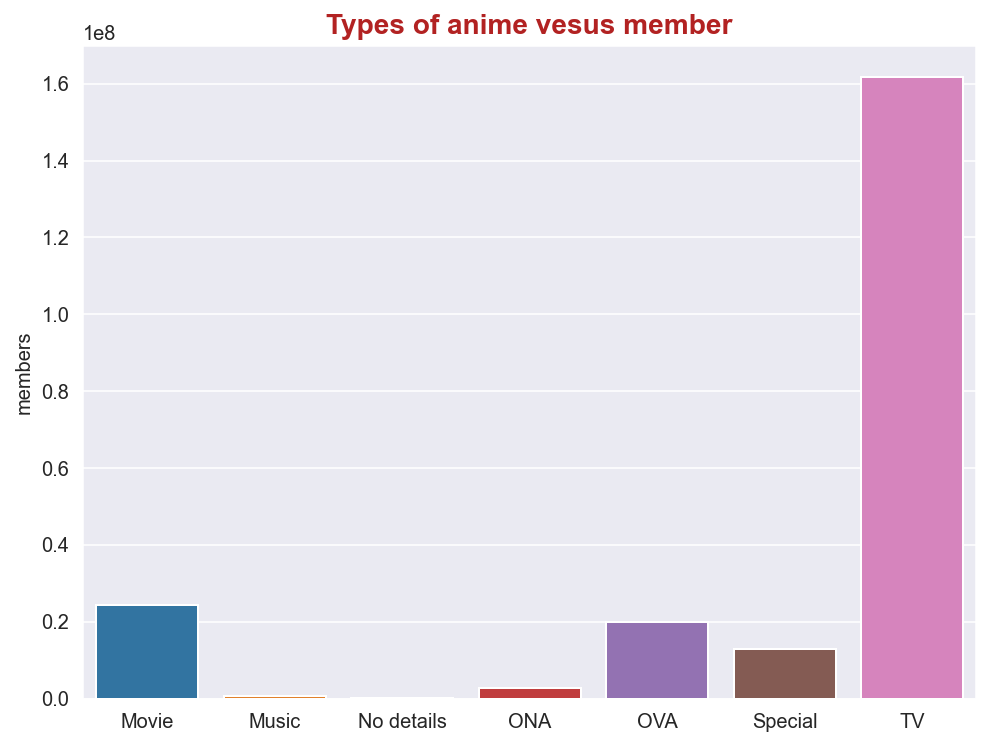

In [63]:
# What's types of anime that have the most member?
type_mem = df1.groupby('type')[['members']].sum()

plt.figure(figsize=(8,6))
sns.barplot(y='members',x=type_mem.index,data=type_mem)
plt.title('Types of anime vesus member',fontsize=14,color='firebrick',fontweight='bold')
plt.xlabel(None)
plt.show()

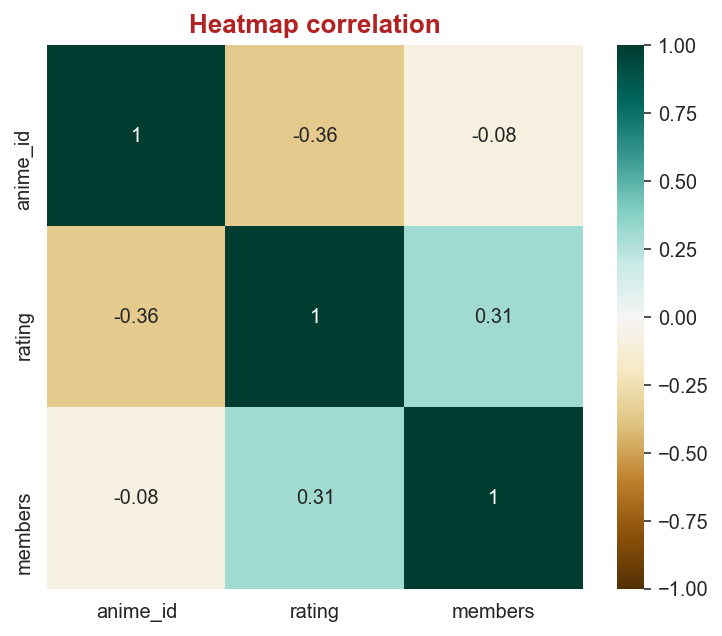

In [64]:
# Lets check on heatmap correlation
plt.figure(figsize=(6,5))
sns.heatmap(df1.corr(), annot = True, center=0,vmax=1,vmin=-1,cmap='BrBG')
plt.title('Heatmap correlation',fontsize=13,color='firebrick',fontweight='bold')
plt.show()

In [65]:
df1.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,movie,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


*Interpreting:*

    It seem likes rating and member have lightly correlation to each other, then lets digging more about this

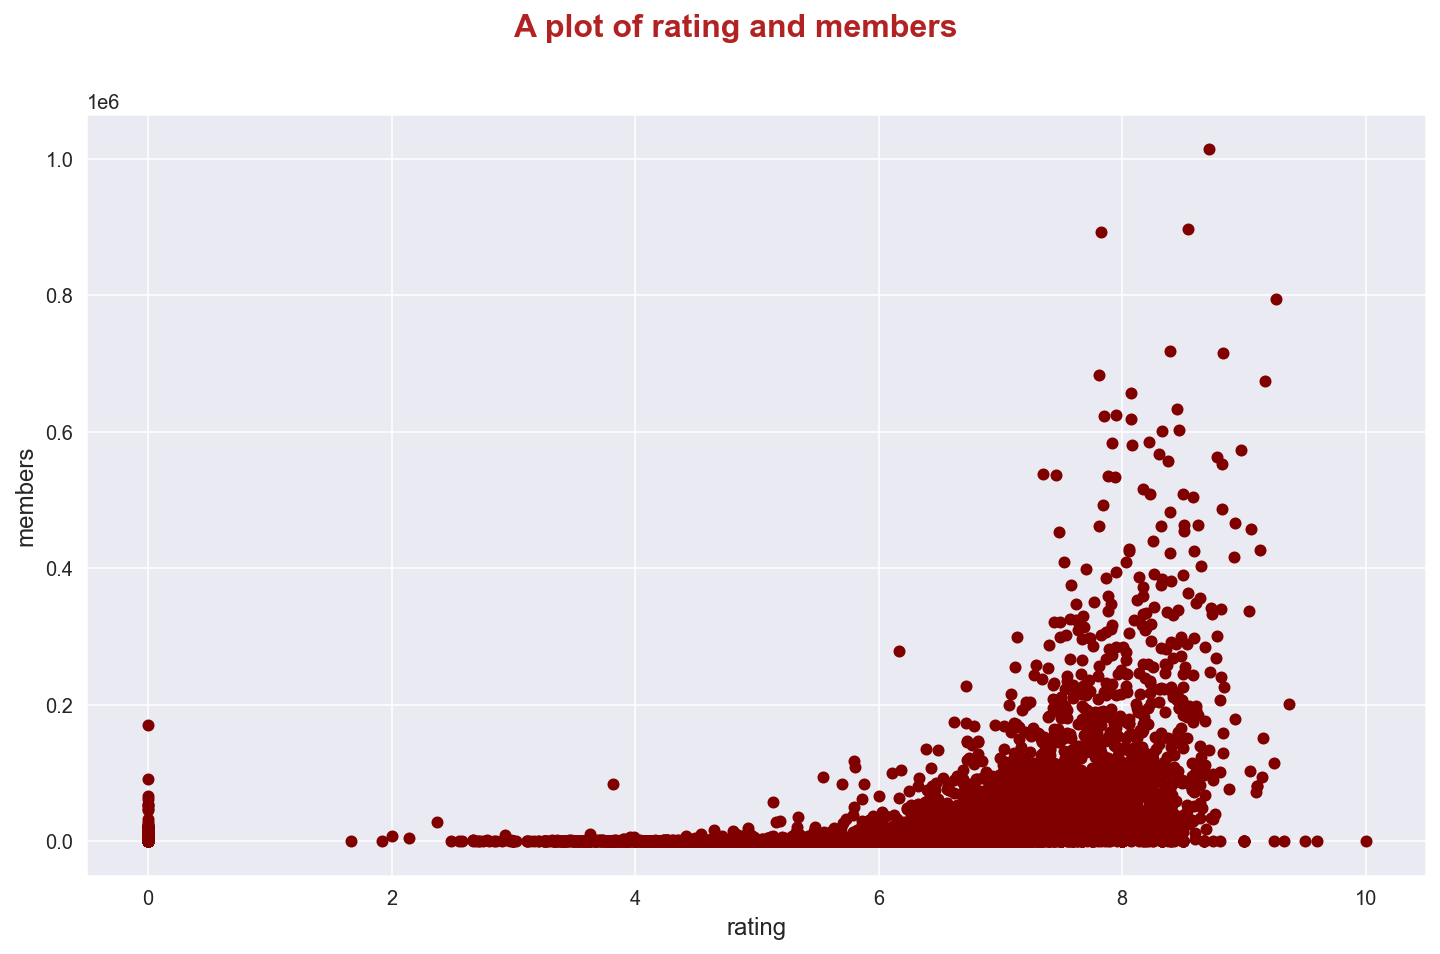

In [66]:
# Robusness correlation exploration between rating and members

fig, ax = plt.subplots(figsize=(12,7))
ax.plot('rating', 'members', 'o', data = df1, color = 'maroon', markersize = 5)
fig.suptitle('A plot of rating and members', fontweight = 'bold',fontsize = 16, color = 'firebrick')
ax.set_xlabel('rating',fontsize=12)
ax.set_ylabel('members',fontsize=12)

plt.show()

*Interpreting:*

    This garantee that both variable are positively correlated together even though their not strongly correlation.

In [67]:
# How about anime that have only one episode (Movie) compare with episodely anime. How the rating work?
mov_df = df1[df1['episodes']=='movie']
epi_df = df1[df1['episodes']!='movie']

print('Average on movie anime rating :',mov_df['rating'].mean())
print('Average on episodely anime rating :',epi_df['rating'].mean())

Average on movie anime rating : 6.144285714285732
Average on episodely anime rating : 6.5316669185431335


*Interpreting:*

    Quickly explored show that most of user are rating on episode type higher than movie type.

#### Rating_C.csv

In [68]:
# import your own directory
df2 = pd.read_csv(r'C:\Users\Vasin\Desktop\Project\Anine_Recommender_System\rating_C.csv',index_col=0)
#df2 = pd.read_csv('\..\rating_C.csv')
# we need user_id, anime_id and rating then index_col be adjust appropriately
df2.head(10)

C:\Users\Vasin\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,user_id,anime_id,rating
0,1,20,0
1,1,24,0
2,1,79,0
3,1,226,0
4,1,241,0
5,1,355,0
6,1,356,0
7,1,442,0
8,1,487,0
9,1,846,0


* We set the anime that wasn't rated by user to 0 then lets check the amount of.

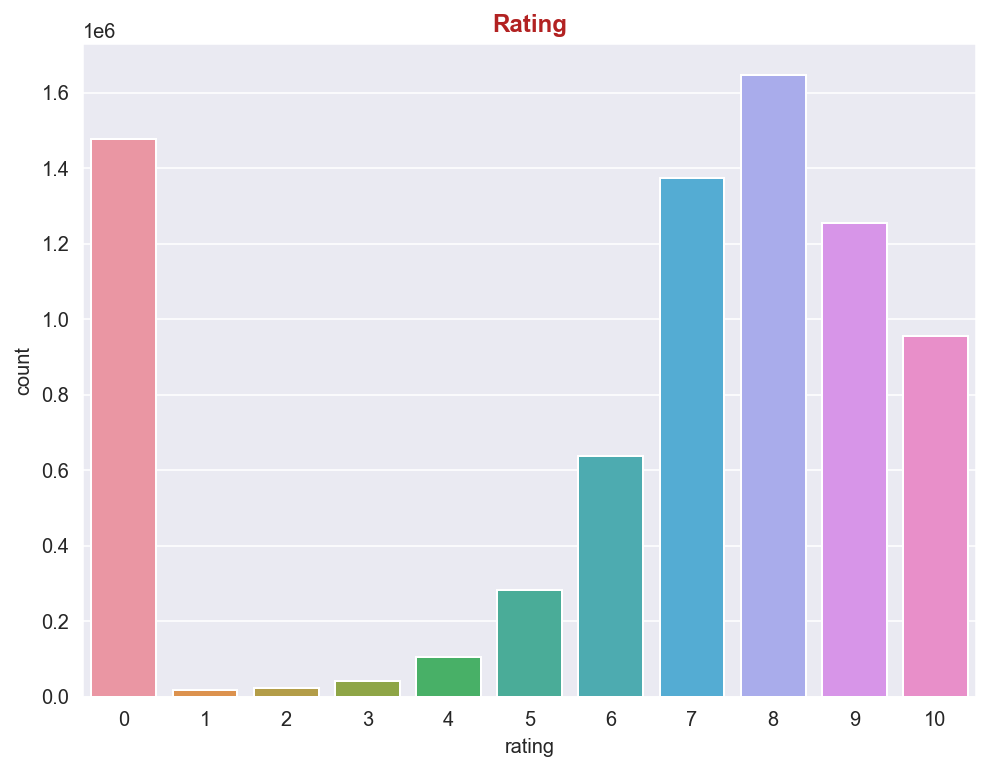

In [69]:
# simple plot show rating
plt.figure(figsize=(8,6))
sns.countplot(x='rating',data=df2)
plt.title('Rating',fontsize=12,color='firebrick',fontweight='bold')
plt.show()

In [70]:
# Let's check the ratio between un-rated anime and rated anime
zero_ = df2[df2['rating']==0]
not_zero_ = df2[df2['rating']!=0]

print('anime that zero : ',zero_['rating'].count())
print('anime that not zero : ',not_zero_['rating'].count())

anime that zero :  1476496
anime that not zero :  6337241


* The rated data is effectively enough for traint the model and we can use the un-rated data as unseen data for testing